# **Frame, Packet, Segment, Datagram**

**Packet:**

컴퓨터 간 데이터를 주고 받을때, 네트워크를 통해 전송되는 데이터 조각 = 패킷. 송신 측(애블리케이션)은 많은 양의 데이터를 한번에 보내는 것이 아니라, 일정 단위로 잘라서 보낸다. 각 게층에서 필요한 정보는 캡슐화 / 역캡슈로하 되어 전달되고, 수신측은 받은 패킷을 다시 조립해서 사용한다.

**Segment:**

Transport 계층(L4)에서 신뢰할 수 있는 통신을 구현하기 위한 헤더를 데이터(L5계층 데이터)에 붙이는데, 이렇게 만들어진 패킷을 세그먼트라고함

**Datagram:**

Network 계층(L3)에서 다른 네트워크와 통신하기 위한 헤더를 세그먼트(L4계층 데이터)에 붙인 것을 데이터그램, 데이터 세그먼트라고 부른다.

**Frame:** 

데이터 링크 계층(L2)에서 물리적인 통신 채널을 열기 위해 패킷에 헤더와 트레일러를 붙인다. 트레일러는 데이터를 전달할 때 데이터 끝부분에 붙이는 정보로, 주로 에로 검출에 사용된다.

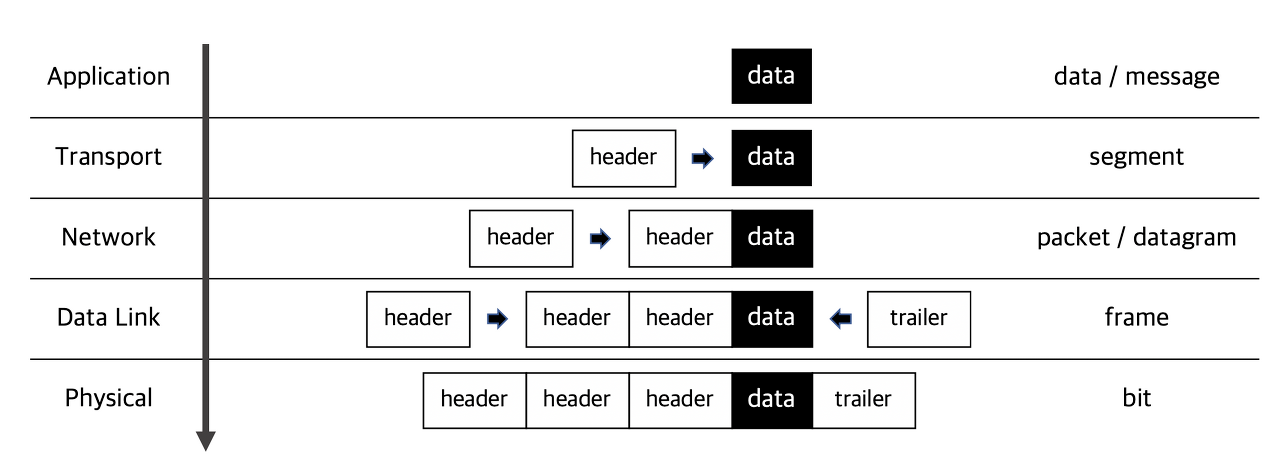

**패킷을 잘라서 보내는 이유**

많은 데이터를 한번에 보내게 되면, 데이터 손실의 가능성이 있으며, 대역폭(신호를 전송할 수 있는 주파수 범위)을 너무 많이 차지하게 되므로, 패킷의 흐름을 원활하게 조절하기 위함이다.

# **소켓(Socket), 포트(Port)**

**Port:**

프로세스를 식별하기 위해, 호스트 내부적으로 프로세스가 할당받는 고유한 값이다. 같은 호스트 내에서 서로 다른 프로세스가 같은 포트 넘버를 가질 수 있음, 대신 같은 소켓을 사용하지는 못한다. accept()를 통해 만들어지는 소켓에는 새로운 포트 번호가 할당되는 것이 아니라, 서버가 가지는 포트(web기준, 80)와 동일한 포트 번호를 가진다. 만약 지정된 포트 번호를 다른 소켓이 사용하고 있다면, bind() API는 에러를 리턴한다. 포트는 논리적인 접속장소이다.

**Socket:**

프로세스로부터 네트워크에 테이터를 전달하는 출입구(인터페이스) 역할을 한다. '프로세스에서 소켓을 연다.'고 표현하며, 수신 측 호스트의 트랜스포트 계층은 실제로 데이터(세그먼트)를 직접 프로세스로 전달하지 않고, 중간 매개자인 소켓에게 전달한다. 호스트에서는 하나 이상의 소켓이 존재할 수 있으므로 소켓은 고유의 식별자를 가지고 있어야 한다. 같은 프로세스가 같은 포트를 가지고도 여러개의 소켓을 열 수 있기 때문에, 소켓 프트는 다른 개념이다.

**요약**

* 소켓 = 프로세스가 네트워크를 통해 데이터를 주고받으려면 반드시 열어야 하는 창구
* 포트 = 프로세스 식별을 위해 하나의 호스트에서 프로세스에 할당하는 고유값
* 패킷 = 네트워크 상의 데이터 조각

**캡슐화 / 역캡슐화**

**캡슐화(Encapsulation):**

(데이터 송신 시)하위 계층으로 패킷을 보낼때, 하위계층에서 필요로하는 추가정보(메타데이터)를 헤더/트레일러에 추가하여 보내게된다.

**역캡슐화(Decapsulation):**

데이터 수신 시, 상위 계층으로 패킷을 전달하고, 전달된 패킷의 헤더를 차례대로 제거하면서 데이터를 얻게된다.